<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In this notebook, we'll build various toy datasets and calculate their sectional curvatures.

This will use the Python symbolic computation library, sympy. Note: this library is not required to use the `diffusion_curvature` package. We merely employ it to calculate the curvature and appropriate expressions for rejection sampling.

In [4]:
import sympy as sym

In [5]:
theta = sym.Symbol('theta')
phi = sym.Symbol('phi')
R = sym.Symbol("R")
r = sym.Symbol("r")

In [6]:
f1 = (R + r*sym.cos(theta))*sym.cos(phi)

In [7]:
sym.diff(f1,theta)

-r*sin(theta)*cos(phi)

In [8]:
f = sym.Matrix([(R + r*sym.cos(theta))*sym.cos(phi), (R + r*sym.cos(theta))*sym.sin(phi), r*sym.sin(theta)])

In [9]:
sym.diff(f, theta)

Matrix([
[-r*sin(theta)*cos(phi)],
[-r*sin(phi)*sin(theta)],
[          r*cos(theta)]])

In [10]:
(sym.diff(f, theta).T  * sym.diff(f, theta))[0]

r**2*sin(phi)**2*sin(theta)**2 + r**2*sin(theta)**2*cos(phi)**2 + r**2*cos(theta)**2

In [11]:
def rejection_sample_formula(f, variables):
    G = sym.Matrix.zeros(2,2)
    for i, x1 in enumerate(variables):
        for j, x2 in enumerate(variables):
            G[i,j] = (sym.diff(f, x1).T  * sym.diff(f, x2))[0]
    return sym.sqrt(G.det().simplify()).simplify()

In [12]:
t = rejection_sample_formula(f,[theta, phi])
t

sqrt(r**2*(R + r*cos(theta))**2)

The curvature of the torus is given by
$$ S(\theta) = \frac{8 \cos{\theta}}{5 + \cos{\theta}} $$

In [1]:
#| echo: false
#| output: asis
show_doc(rejection_sample_for_torus)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/datasets.py#L15){target="_blank" style="float:right; font-size:smaller"}

### rejection_sample_for_torus

>      rejection_sample_for_torus (n, r, R)

In [2]:
#| echo: false
#| output: asis
show_doc(torus)

/home/piriac/mambaforge/envs/diffusion_curvature/lib/python3.11/site-packages/fastcore/docscrape.py:225: UserWarning: potentially wrong underline length... 
Parameters 
----------- in 
Sample `n` data points on a torus. Modified from [tadasets.shapes — TaDAsets 0.1.0 documentation](https://tadasets.scikit-tda.org/en/latest/_modules/tadasets/shapes.html#torus)
Uses rejection sampling....
  else: warn(msg)


---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/datasets.py#L22){target="_blank" style="float:right; font-size:smaller"}

### torus

>      torus (n=2000, c=2, a=1, noise=None, seed=None, use_guide_points=False)

Sample `n` data points on a torus. Modified from [tadasets.shapes — TaDAsets 0.1.0 documentation](https://tadasets.scikit-tda.org/en/latest/_modules/tadasets/shapes.html#torus)
Uses rejection sampling.

In addition to the randomly generated points, a few constant points have been added.
The 0th point is on the outer rim, in a region of high positive curvature. The 1st point is in the inside, in a region of negative curvature, and the 2nd point is on the top, where the curvature should be closer to zero.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| n | int | 2000 | Number of data points in shape. |
| c | int | 2 | Distance from center to center of tube. |
| a | int | 1 | Radius of tube. |
| noise | NoneType | None |  |
| seed | NoneType | None | Seed for random state. |
| use_guide_points | bool | False |  |

Visualize with the curvature

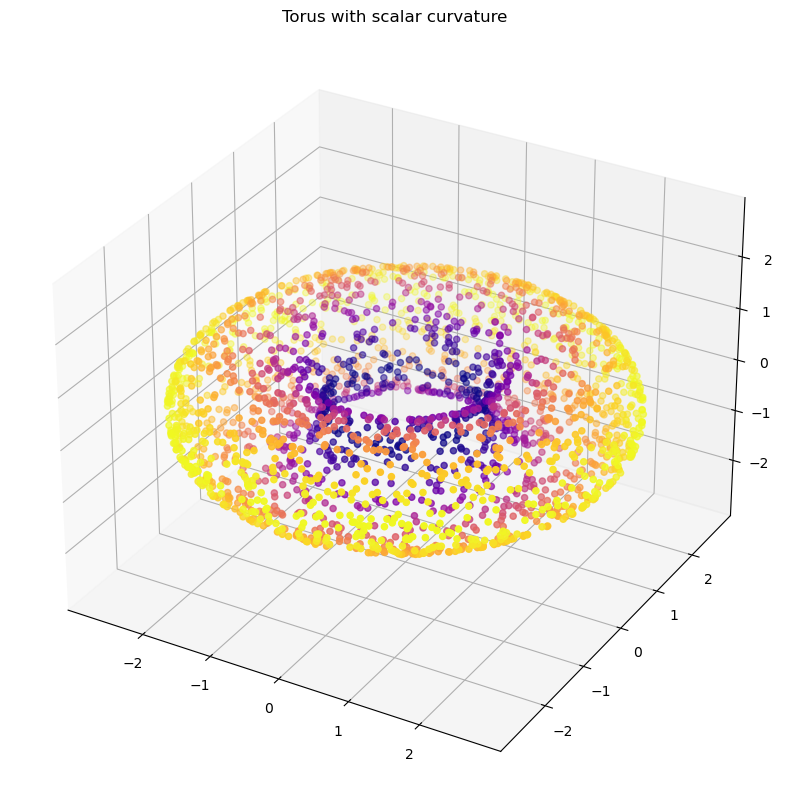

In [15]:
X,ks = torus(n=5000)
plot_3d(X, ks, title="Torus with scalar curvature")

# One-Sheet Hyperboloid

First, let's determine the rejection sampling formula

In [16]:
a = sym.Symbol('a')
b = sym.Symbol('b')
theta = sym.Symbol("theta")
u = sym.Symbol('u')
f = sym.Matrix(
    [a*sym.cos(theta)*sym.sqrt(u**2+1),b*sym.sin(theta)*sym.sqrt(u**2+1),u]
)

In [17]:
variables = [theta, u]
rej = rejection_sample_formula(f, variables)
rej

sqrt(a**2*b**2*u**2 + a**2*u**2*sin(theta)**2 + a**2*sin(theta)**2 - b**2*u**2*sin(theta)**2 + b**2*u**2 - b**2*sin(theta)**2 + b**2)

In [3]:
#| echo: false
#| output: asis
show_doc(hyperboloid)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/datasets.py#L74){target="_blank" style="float:right; font-size:smaller"}

### hyperboloid

>      hyperboloid (n=2000, a=2, b=2, c=1, u_limit=2, seed=None)

Sample roughly n points on a hyperboloid, using rejection sampling.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| n | int | 2000 | number of points, by default 2000 |
| a | int | 2 | hyperboloid param1, by default 2 |
| b | int | 2 | hyperboloid param2, by default 2 |
| c | int | 1 | stretchiness in z, by default 1 |
| u_limit | int | 2 | Constrain the free parameter u to [-l,l], by default 2 |
| seed | NoneType | None | For repeatability, seed the randomness, by default None |
| **Returns** | **The sampled points, and the curvatures of each point** |  |  |

In [4]:
#| echo: false
#| output: asis
show_doc(rejection_sample_for_hyperboloid)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/datasets.py#L67){target="_blank" style="float:right; font-size:smaller"}

### rejection_sample_for_hyperboloid

>      rejection_sample_for_hyperboloid (n, a, b, c, u_limit)

In [19]:
#| echo: false
#| output: asis
show_doc

<function nbdev.showdoc.show_doc(sym, renderer=None, name: 'str | None' = None, title_level: 'int' = 3)>

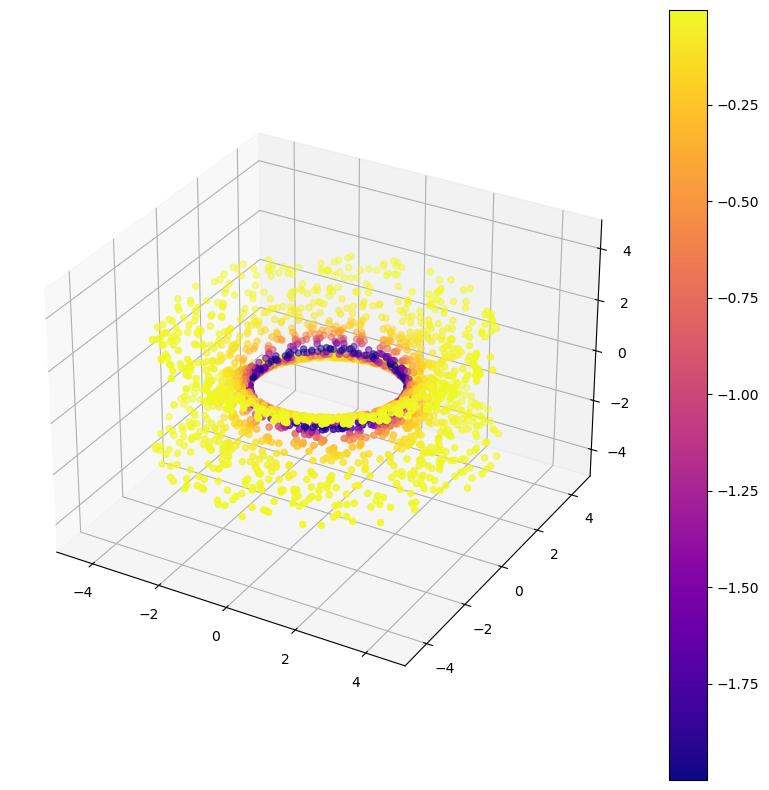

In [20]:
X, ks = hyperboloid(2000)
plot_3d(X,ks,colorbar=True,use_plotly=False)

# Ellipsoid

In [21]:
a = sym.Symbol('a')
b = sym.Symbol('b')
c = sym.Symbol('c')
theta = sym.Symbol("theta")
phi = sym.Symbol("phi")
u = sym.Symbol('u')
f = sym.Matrix(
    [a*sym.cos(theta)*sym.sin(phi),b*sym.sin(theta)*sym.sin(phi),c*sym.cos(phi)]
)

In [22]:
variables = [theta, phi]
rej = rejection_sample_formula(f, variables)
rej

sqrt(-a**2*b**2*sin(phi)**4 + a**2*b**2*sin(phi)**2 + a**2*c**2*sin(phi)**4*sin(theta)**2 - b**2*c**2*sin(phi)**4*sin(theta)**2 + b**2*c**2*sin(phi)**4)

In [5]:
#| echo: false
#| output: asis
show_doc(ellipsoid)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/datasets.py#L117){target="_blank" style="float:right; font-size:smaller"}

### ellipsoid

>      ellipsoid (n=2000, a=3, b=2, c=1, seed=None, noise=None)

Sample roughly n points on an ellipsoid, using rejection sampling.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| n | int | 2000 | number of points, by default 2000 |
| a | int | 3 | ellipsoid param1, by default 3 |
| b | int | 2 | ellipsoid param2, by default 2 |
| c | int | 1 | stretchiness in z, by default 1 |
| seed | NoneType | None | For repeatability, seed the randomness, by default None |
| noise | NoneType | None |  |
| **Returns** | **The sampled points, and the curvatures of each point** |  |  |

In [6]:
#| echo: false
#| output: asis
show_doc(rejection_sample_for_ellipsoid)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/datasets.py#L110){target="_blank" style="float:right; font-size:smaller"}

### rejection_sample_for_ellipsoid

>      rejection_sample_for_ellipsoid (n, a, b, c)

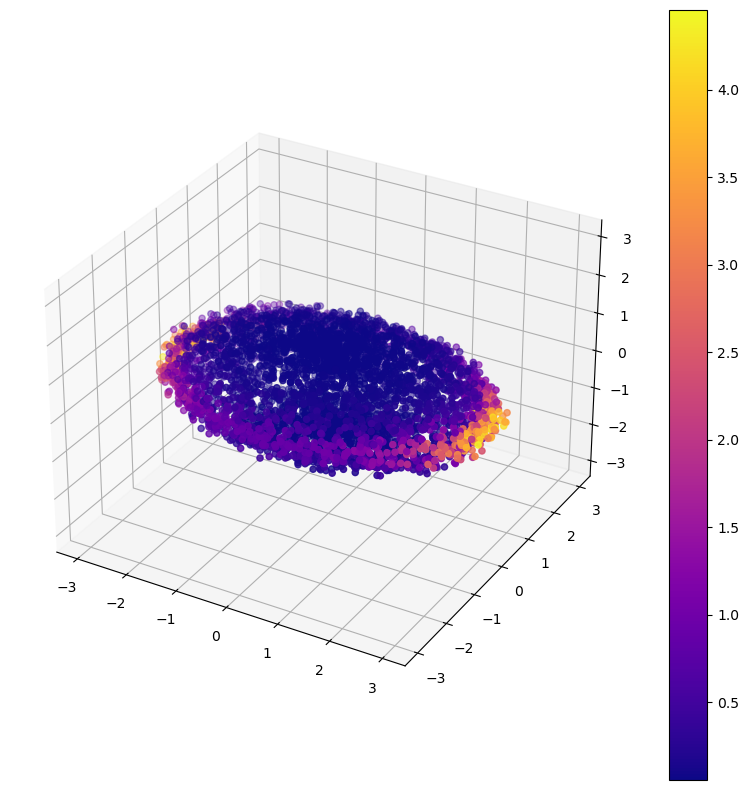

In [24]:
X, ks = ellipsoid(n=5000, noise = 0.1)
plot_3d(X,ks,colorbar=True)

# Hypersphere

In [7]:
#| echo: false
#| output: asis
show_doc(sphere)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/datasets.py#L156){target="_blank" style="float:right; font-size:smaller"}

### sphere

>      sphere (n, radius=1, noise=0, use_guide_points=False)

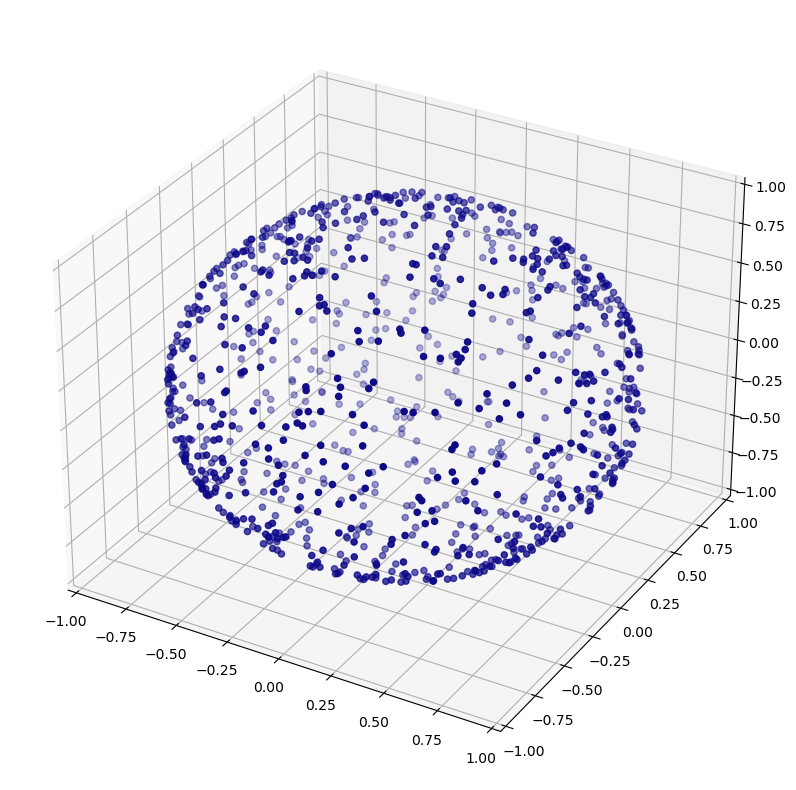

In [45]:
X, ks = sphere(n=1000)
plot_3d(X)

# Random Cube

In [27]:
def random_cube(n):
    """Return a random cube

    Parameters
    ----------
    n : _type_
        _description_

    Returns
    -------
    _type_
        _description_
    """
    data = np.random.rand(n,3)
    return data

# Saddle Regions
Generate hyperbolic regions as test cases of Laziness curvature.

In [28]:
a = sym.Symbol('a')
b = sym.Symbol('b')
x = sym.Symbol("x")
y = sym.Symbol("y")
f = sym.Matrix(
    [x,y,a*x**2 + b*y**2]
)

In [29]:
variables = [x, y]
rej = rejection_sample_formula(f, variables)
rej

sqrt(4*a**2*x**2 + 4*b**2*y**2 + 1)

In [8]:
#| echo: false
#| output: asis
show_doc(paraboloid)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/datasets.py#L178){target="_blank" style="float:right; font-size:smaller"}

### paraboloid

>      paraboloid (n=2000, a=1, b=-1, seed=None, use_guide_points=False)

Sample roughly n points on a saddle, using rejection sampling for even density coverage
Defined by $ax^2 + by^2$.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| n | int | 2000 | number of points, by default 2000 |
| a | int | 1 | ellipsoid param1, by default 1 |
| b | int | -1 | ellipsoid param2, by default -1 |
| seed | NoneType | None | For repeatability, seed the randomness, by default None |
| use_guide_points | bool | False |  |
| **Returns** | **The sampled points, and the curvatures of each point** |  |  |

In [9]:
#| echo: false
#| output: asis
show_doc(rejection_sample_for_saddle)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/datasets.py#L171){target="_blank" style="float:right; font-size:smaller"}

### rejection_sample_for_saddle

>      rejection_sample_for_saddle (n, a, b)

In [31]:
X, ks = paraboloid(n=10000, a = 1, b = -1,use_guide_points=True)

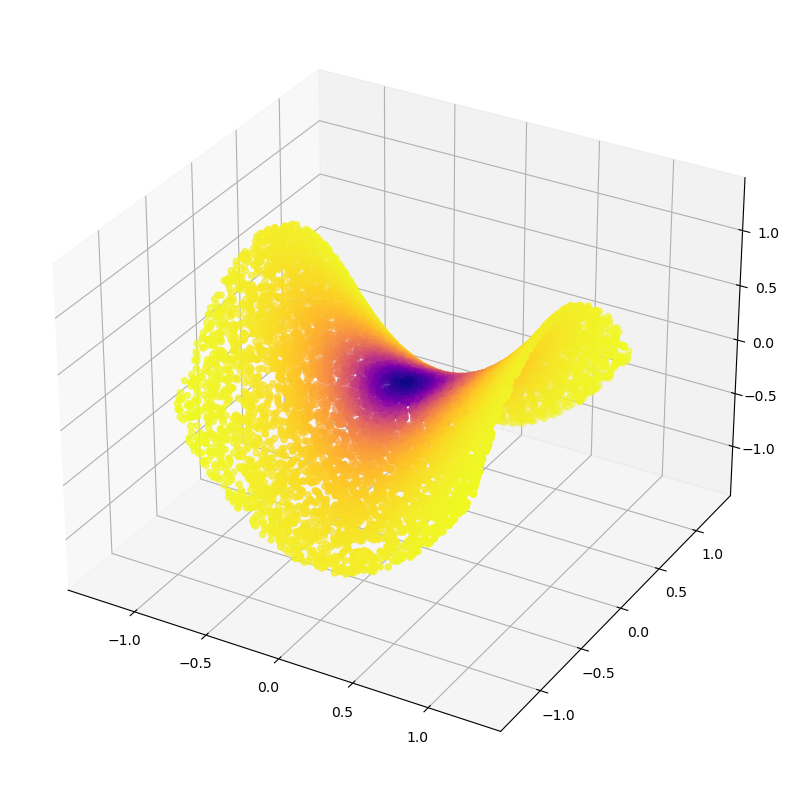

In [32]:
plot_3d(X,ks)

In [33]:
x = np.zeros(10)

In [34]:
np.concatenate([[0],x])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [35]:
np.savetxt("datasets/hyperboloid.txt",X)

In [36]:
Y = np.loadtxt("datasets/hyperboloid.txt",dtype=float)

In [37]:
Y

array([[ 0.        ,  0.        ,  0.        ],
       [-0.9521675 ,  0.29979808,  0.81674406],
       [-0.77266581, -0.28437732,  0.51614199],
       ...,
       [ 0.00402681,  0.94392053, -0.89096976],
       [-0.42648474, -0.18276849,  0.14848491],
       [-0.64865911,  0.02571754,  0.42009725]])

# The Plane

In [10]:
#| echo: false
#| output: asis
show_doc(plane)

---

[source](https://github.com/professorwug/diffusion_curvature/blob/main/diffusion_curvature/datasets.py#L218){target="_blank" style="float:right; font-size:smaller"}

### plane

>      plane (n)

In [39]:
!nbdev_export